In [284]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from torch.optim.lr_scheduler import LambdaLR

## Task 2

### (a)

In [285]:
# Load data

data = np.loadtxt("data/x_y.csv", delimiter=",", skiprows=1)
data.shape

(1000, 2)

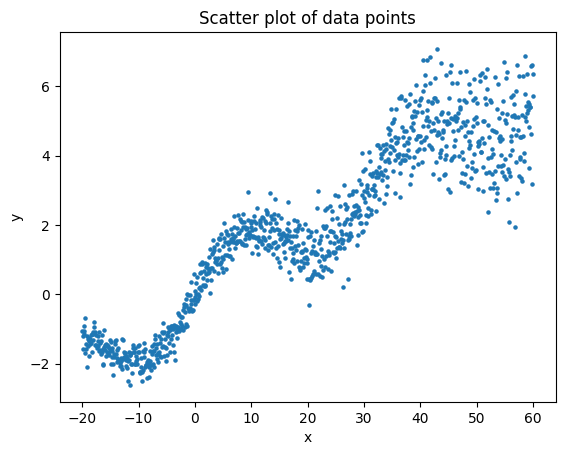

In [286]:
# Plot data

plt.scatter(data[:, 0], data[:, 1], s=5)

plt.title("Scatter plot of data points")
plt.xlabel("x") 
plt.ylabel("y")

plt.show()

In [287]:
# split data

np.random.seed(1565714588)

shuffled_indices = np.random.permutation(len(data))
train_size = int(len(data) * 0.66)
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

train_set = data[train_indices]
test_set = data[test_indices]

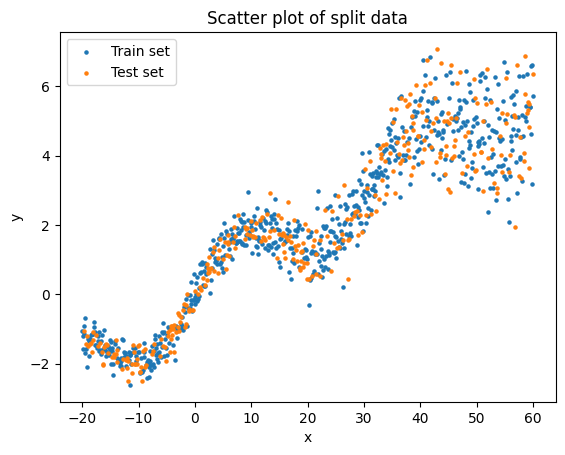

In [288]:
# Plot split data

plt.scatter(train_set[:, 0], train_set[:, 1], s=5, label="Train set")
plt.scatter(test_set[:, 0], test_set[:, 1], s=5, label="Test set")

plt.title("Scatter plot of split data")
plt.xlabel("x")     
plt.ylabel("y")
plt.legend()

plt.show()

### (c)

In [289]:
# Define MLP model

class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 32),
            t.nn.ReLU(),
            t.nn.Linear(32, 64),
            t.nn.ReLU(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

In [290]:
# initialize model

model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001)
criterion = t.nn.MSELoss()

In [291]:
# Train model

inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

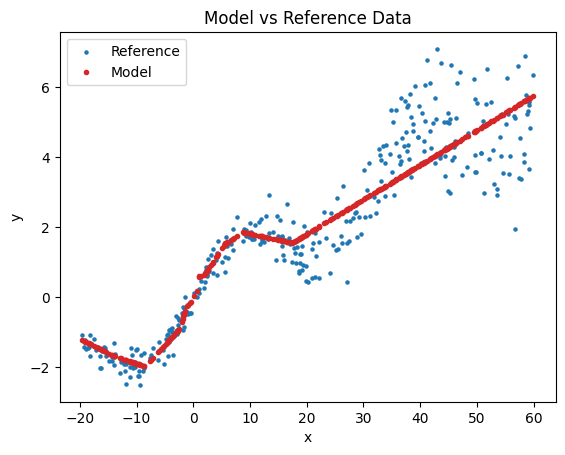

In [292]:
# Plot the resulting model on the test set together with the reference data points

model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

Sometimes for $x\lesssim 20$ the model fits the data quite well and For $x\gtrsim$ the model seems to slightly underfit, sometimes the fit is ok. Overall the fit is a bit cornered.

In [293]:
# test model performance on test set

inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.7399293184280396


### (d)

#### Change learning rate

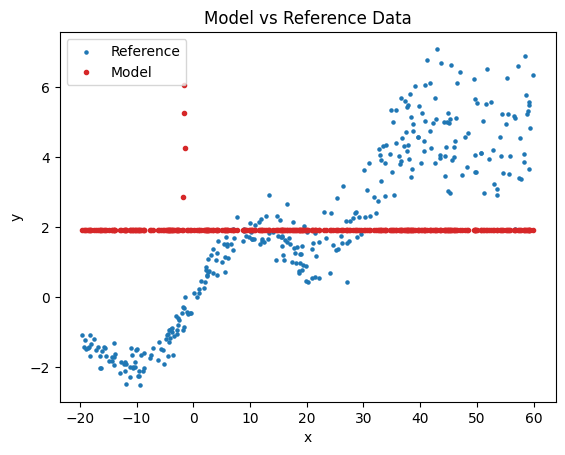

Test Loss: 6.539633274078369


In [294]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 32),
            t.nn.ReLU(),
            t.nn.Linear(32, 64),
            t.nn.ReLU(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=1)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

* learning rate to small (e.g. .000001): Curve underfits, goes linear
* learning rate to big (e.g. 1): Curve is flat, loss explodes

#### Change architecture

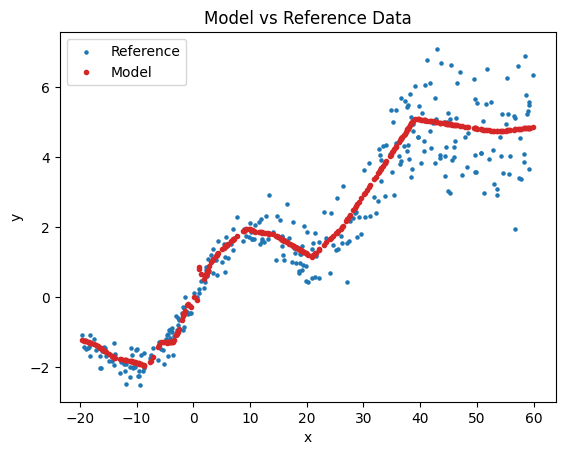

Test Loss: 0.47055524587631226


In [295]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 64),
            t.nn.ReLU(),
            t.nn.Linear(64, 128),       # add layer
            t.nn.ReLU(),                #
            t.nn.Linear(128, 64),       #
            t.nn.ReLU(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

$\Rightarrow$ fits the upper part better

#### Change activation function to Sigmoid

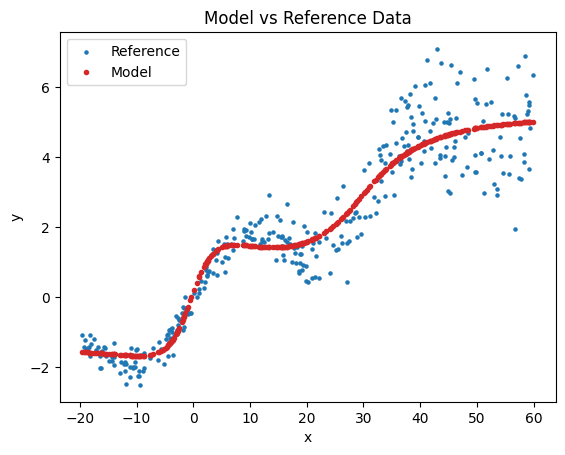

Test Loss: 0.5619491934776306


In [296]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 32),
            t.nn.Sigmoid(),
            t.nn.Linear(32, 64),
            t.nn.Sigmoid(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

$\Rightarrow$ a bit smoother but not "wavy" enough

#### Change activation to tanh

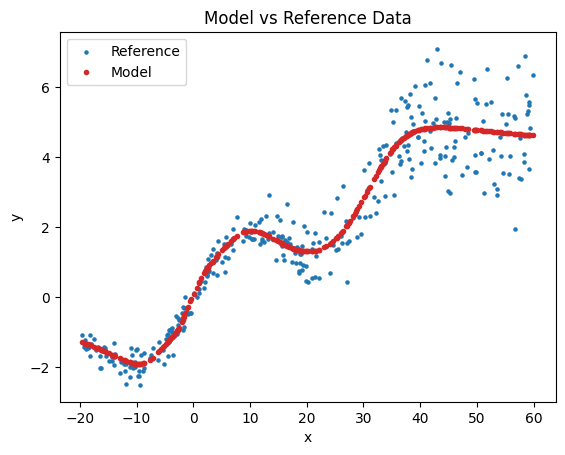

Test Loss: 0.4666018784046173


In [297]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 32),
            t.nn.Tanh(),
            t.nn.Linear(32, 64),
            t.nn.Tanh(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

$\Rightarrow$ looks really good

#### Change activation to tanh and to larger architecture

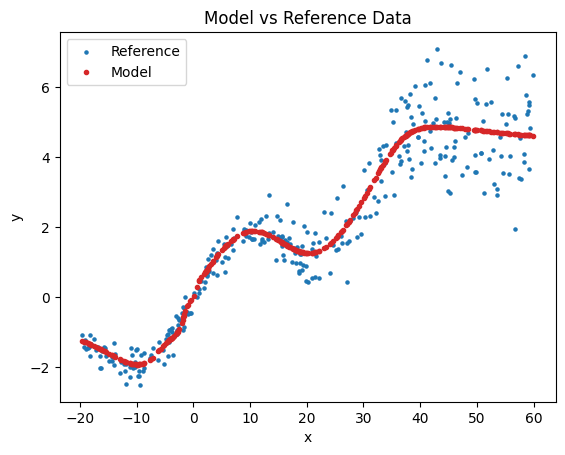

Test Loss: 0.4653932452201843


In [298]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 64),
            t.nn.Tanh(),
            t.nn.Linear(64, 128),       # add layer
            t.nn.Tanh(),                #
            t.nn.Linear(128, 64),       #
            t.nn.Tanh(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

$\Rightarrow$ No big change, just subtle and insignificant decrease in Test loss.

#### Add L2 weight decay

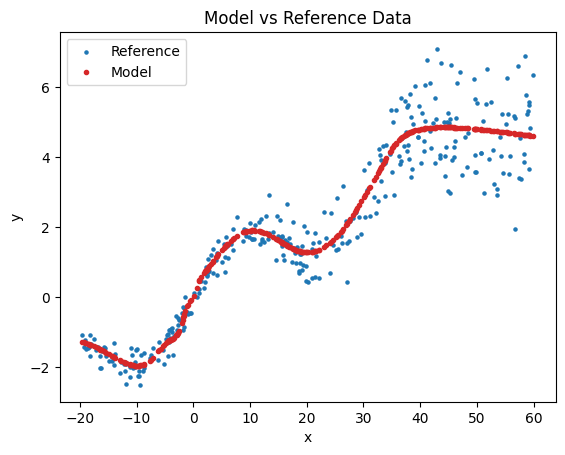

Test Loss: 0.46802496910095215


In [299]:
# Define MLP model
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 64),
            t.nn.Tanh(),
            t.nn.Linear(64, 128),       # add layer
            t.nn.Tanh(),                #
            t.nn.Linear(128, 64),       #
            t.nn.Tanh(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.001, weight_decay=1e-5)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5)
plt.plot(test_set[:, 0], outputs.detach().numpy(), '.', label='Model', color='tab:red')

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
test_loss = criterion(outputs, targets)
print(f"Test Loss: {test_loss.item()}")

$\Rightarrow$ Again no big change, just subtle and insignificant decrease in Test loss.

#### Add learning rate scheduler

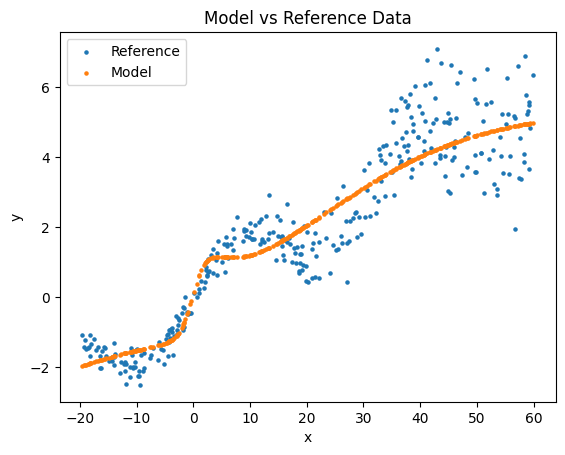

Test Loss: 0.7262360453605652


In [ ]:
class MLP(t.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = t.nn.Sequential(
            t.nn.Linear(1, 64),
            t.nn.Tanh(),
            t.nn.Linear(64, 128),       
            t.nn.Tanh(),                
            t.nn.Linear(128, 64),       
            t.nn.Tanh(),
            t.nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.net(x)
        return x
    
# add scheduler
warmup_epochs = 10                                                                
total_epochs = 2000                                                                                                                
                                                                                    
def lr_lambda(epoch):                                                                                                     
    if epoch < warmup_epochs:                                                       
        return (epoch + 1) / warmup_epochs                                          
    else:                                                                                                         
        progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)         
        return 0.5 * (1 + np.cos(np.pi * progress))                                                

# initialize model
model = MLP()
optimizer = t.optim.Adam(model.parameters(), lr=.0001)
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)
criterion = t.nn.MSELoss()

# Train model
inputs = t.tensor(train_set[:, 0:1], dtype=t.float32)
targets = t.tensor(train_set[:, 1:2], dtype=t.float32)

for epoch in range(2000):
    model.train() 
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()
    scheduler.step()

# Plot the resulting model on the test set together with the reference data points
model.eval()    
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
outputs = model(inputs)

plt.scatter(test_set[:, 0], test_set[:, 1], label='Reference', s=5) 
plt.scatter(test_set[:, 0], outputs.detach().numpy(), label='Model', s=5)

plt.legend()
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Model vs Reference Data")

plt.show()

# test model performance on test set
inputs = t.tensor(test_set[:, 0:1], dtype=t.float32)
targets = t.tensor(test_set[:, 1:2], dtype=t.float32)
outputs = model(inputs)
loss = criterion(outputs, targets)

print(f"Test Loss: {loss.item()}")

$\Rightarrow$ less accurate